# Exploration and Analysis of UFO sightings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("ufoSightings.csv")
df.head()

C:\Users\fitzp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
# dropping null rows
df = df.dropna(how="any")

In [4]:
df.shape

(66516, 11)

In [5]:
#useful dataframes
df_country = df.groupby('country')
df_usa = df[df['country'] == 'us']
df_shape = df.groupby('shape')

In [6]:
df_country['country'].value_counts()

country  country
au       au            10
ca       ca          2942
gb       gb            11
us       us         63553
Name: country, dtype: int64

In [7]:
# We see that within our data set, the vast majority of of reported sightings are within the united states.
# As such we will focus on only the united states.

In [8]:
print('The earliest sighting in the data set is: ' + str(df['datetime'].min()))
print('The most recent sighting in the data set is: ' + str(df['datetime'].max()) )

The earliest sighting in the data set is: 1/1/1944 12:00
The most recent sighting in the data set is: 9/9/2013 9:51


In [9]:
print('The US has ' + str(df_usa.shape[0]) + ' sightings')

The US has 63553 sightings


In [10]:
# Here we can see that the top five states for ufo sightings are California, Florida, Washington, Texas, and New York
state_counts = df_usa['state'].value_counts()
state_counts.head(5)


ca    8683
fl    3754
wa    3707
tx    3398
ny    2915
Name: state, dtype: int64

In [11]:
# Whereas the states with the least sightings are Wyoming, Deleware, North Dakota Puerto Rico, and DC 
state_counts.tail(5)

wy    169
de    165
nd    123
pr     24
dc      7
Name: state, dtype: int64

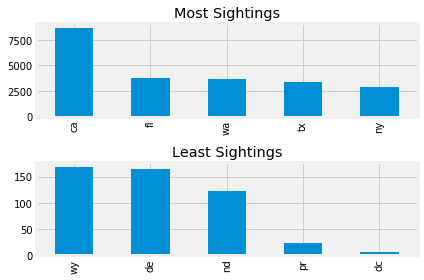

In [12]:
plt.figure(1)

ax1 = plt.subplot(2, 1, 1)
state_counts.head().plot(kind='bar')
plt.title('Most Sightings')

ax2 = plt.subplot(2, 1, 2)
state_counts.tail().plot(kind='bar')
plt.title('Least Sightings')

plt.tight_layout()

count      52.000000
mean     1222.173077
std      1404.666309
min         7.000000
25%       454.500000
50%       798.000000
75%      1396.500000
max      8683.000000
Name: state, dtype: float64

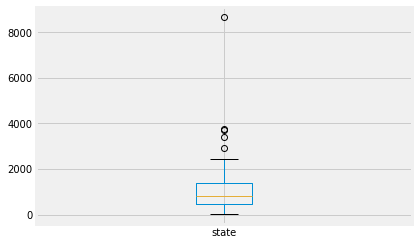

In [13]:
state_counts.plot(kind='box')
state_counts.describe()